# Imports

In [2]:
#Import tensorflow
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

# The seed for replication purposes
seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

# Working with a dataset

##Load and explore the dataset

[**Fashion MNIST Dataset**](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [3]:
## Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
## Images by 28x28
print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)
60000 train samples
10000 test samples


In [6]:
## Images labels
class_names = ['t-shirt/top','trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


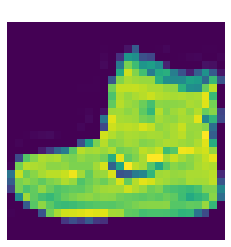

In [9]:
## Show images
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.axis('off')
plt.show()

## Transform
Convert to grayscale, normalize & standarize

In [10]:
## Convert to optimize training
train_images = (train_images-np.mean(train_images)) / np.std(train_images)
train_images = tf.squeeze(train_images / 255.0)

test_images = (test_images-np.mean(test_images)) / np.std(test_images)
test_images = tf.squeeze(test_images / 255.0)

train_images.shape, test_images.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

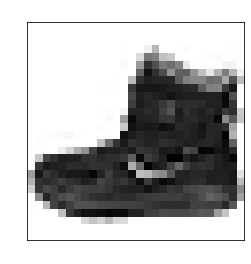

In [12]:
## Show in grayscale
plt.imshow(train_images[0], cmap=plt.cm.binary)
#plt.title(class_names[train_labels[0][0]])
plt.title(class_names[train_labels[0]])
plt.show()

## Explore final dataset

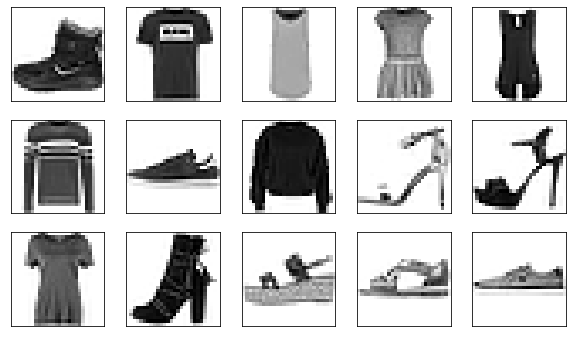

In [11]:
## Show images in grid
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i][0]], color='w')
    plt.xlabel(class_names[train_labels[i]], color='w')
plt.show()

# Build the model

In [13]:
## Buid layers (softmax is for multi-class classification)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(784, activation='relu'),
    Dense(392, activation='relu'),
    Dense(196, activation='relu'),
    Dense(98, activation='relu'),
    Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 392)               307720    
                                                                 
 dense_2 (Dense)             (None, 196)               77028     
                                                                 
 dense_3 (Dense)             (None, 98)                19306     
                                                                 
 dense_4 (Dense)             (None, 10)                990       
                                                                 
Total params: 1,020,484
Trainable params: 1,020,484
Non-

In [16]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.3,
          epochs=10
          )

Epoch 1/10
1313/1313 [==============================] - 14s 10ms/step - loss: 0.6154 - accuracy: 0.7704 - val_loss: 0.4682 - val_accuracy: 0.8288
Epoch 2/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4243 - accuracy: 0.8450 - val_loss: 0.3877 - val_accuracy: 0.8613
Epoch 3/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.3725 - accuracy: 0.8619 - val_loss: 0.3695 - val_accuracy: 0.8658
Epoch 4/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3450 - accuracy: 0.8735 - val_loss: 0.3606 - val_accuracy: 0.8716
Epoch 5/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3213 - accuracy: 0.8813 - val_loss: 0.3442 - val_accuracy: 0.8763
Epoch 6/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3017 - accuracy: 0.8884 - val_loss: 0.3403 - val_accuracy: 0.8724
Epoch 7/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.2846 - accuracy: 0.8943 - val_loss: 0.3197 - 

# Evaluate

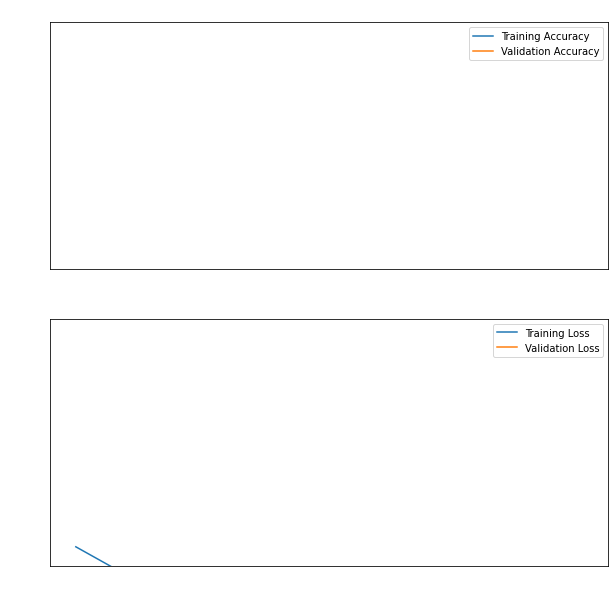

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.7])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.5,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.3543042838573456
Accuracy: 0.8770999908447266


# Make predictions

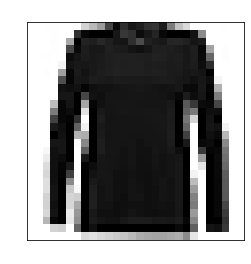


Predicted class is: Pullover


In [19]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index]])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])

In [20]:
test_image = tf.keras.utils.get_file('car.jpg','https://www.extremetech.com/wp-content/uploads/2019/05/637873-tesla-model-s-2019-640x360.jpg')
test_image = Image.open(test_image).resize((32,32)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))

plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])

40960/29931 [=========================================] - 0s 0us/step


ValueError: ignored